In [21]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.wkt import loads

In [41]:
rail_station_count =pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\metro_area.csv').drop(columns = 'Unnamed: 0')

geometry = rail_station_count['geometry'].map(shapely.wkt.loads)
rail_station_count = rail_station_count.drop('geometry', axis=1)
rail_station_count = gpd.GeoDataFrame(rail_station_count, geometry=geometry)
rail_station_count = rail_station_count.set_crs("EPSG:4326")

# buffer = 300
rail_station = rail_station_count.to_crs("EPSG:32649")
rail_station['buffer'] = rail_station.buffer(1500)

rail_station_buffer = gpd.GeoDataFrame(rail_station,geometry = 'buffer')
rail_station_buffer = rail_station_buffer.drop(columns = 'index_right')

In [42]:
rail_station_buffer

,linename,stationnam,sl,poiid,lg,sp,lon,lat,hex_id,cluster_la,functional,function_1,geometry,buffer
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,Rural,4,POINT (820809.311 2495070.993),"POLYGON ((822309.311 2495070.993, 822302.088 2..."
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,0,Rural,4,POINT (820748.669 2495450.082),"POLYGON ((822248.669 2495450.082, 822241.446 2..."
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,30445,1,Center,1,POINT (820816.745 2495913.339),"POLYGON ((822316.745 2495913.339, 822309.522 2..."
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,30441,1,Center,1,POINT (820603.435 2496413.511),"POLYGON ((822103.435 2496413.511, 822096.212 2..."
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,30440,1,Center,1,POINT (819669.497 2496124.436),"POLYGON ((821169.497 2496124.436, 821162.274 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,地铁11号线,福永,"113.806076,22.673562",BV10249452,0,FuYong,113.806076,22.673562,18097,2,Sub-center,2,POINT (788339.380 2510107.183),"POLYGON ((789839.380 2510107.183, 789832.157 2..."
230,地铁11号线,机场,"113.813663,22.624026",BV10527864,6,ji chang,113.813663,22.624026,10976,3,Outskirt,3,POINT (789223.295 2504633.877),"POLYGON ((790723.295 2504633.877, 790716.072 2..."
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,24808,1,Center,1,POINT (793691.303 2499293.417),"POLYGON ((795191.303 2499293.417, 795184.080 2..."
232,地铁11号线,宝安,"113.880396,22.554590",BV10527865,6,bao an,113.880396,22.554590,33438,1,Center,1,POINT (796235.679 2497072.139),"POLYGON ((797735.679 2497072.139, 797728.456 2..."


<AxesSubplot:>

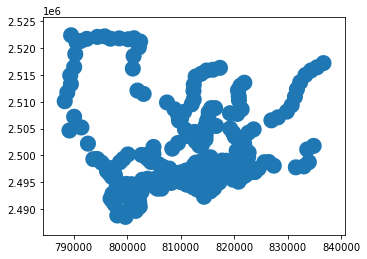

In [43]:
rail_station_buffer.plot()

# combine

In [44]:
import os
folder = r"D:\bike\data\深圳市POI\ShapeFile"
shp_list = []
for i in os.walk(folder):
    for m in i[2]:
        if m.endswith('shp'):
            shp_list.append(m)

In [45]:
shp_list

['深圳市_事件活动_20220602_042651.shp',
 '深圳市_交通设施服务_20220602_041308.shp',
 '深圳市_住宿服务_20220602_040709.shp',
 '深圳市_体育休闲服务_20220602_040438.shp',
 '深圳市_公共设施_20220602_042649.shp',
 '深圳市_公司企业_20220602_041919.shp',
 '深圳市_医疗保健服务_20220602_040600.shp',
 '深圳市_商务住宅_20220602_040833.shp',
 '深圳市_地名地址信息_20220602_042612.shp',
 '深圳市_室内设施_20220602_042824.shp',
 '深圳市_摩托车服务_20220602_033442.shp',
 '深圳市_政府机构及社会团体_20220602_041004.shp',
 '深圳市_汽车服务_20220602_033348.shp',
 '深圳市_汽车维修_20220602_033427.shp',
 '深圳市_汽车销售_20220602_033405.shp',
 '深圳市_生活服务_20220602_040333.shp',
 '深圳市_科教文化服务_20220602_041139.shp',
 '深圳市_购物服务_20220602_035618.shp',
 '深圳市_通行设施_20220602_042951.shp',
 '深圳市_道路附属设施_20220602_041943.shp',
 '深圳市_金融保险服务_20220602_041340.shp',
 '深圳市_风景名胜_20220602_040729.shp',
 '深圳市_餐饮服务_20220602_034130.shp']

In [46]:
shp_list[0].split('_')[1]

'事件活动'

In [47]:
def get_dt(x):
    poi = gpd.read_file(r"D:\bike\data\深圳市POI\ShapeFile\{}".format(x))
    poi = poi[['大类','geometry']]
    poi =  poi.to_crs("EPSG:32649")
    poim = gpd.sjoin(rail_station_buffer,poi,predicate = 'contains')
    poim = poim.groupby(by = 'stationnam').count()[['大类']]
    poi_type = x.split('_')[1]
    poim.columns = [poi_type]
    return poim

In [48]:
all_poi = pd.concat([get_dt(x) for x in shp_list],axis = 1 )

In [49]:
all_poi

,事件活动,交通设施服务,住宿服务,体育休闲服务,公共设施,公司企业,医疗保健服务,商务住宅,地名地址信息,室内设施,...,汽车维修,汽车销售,生活服务,科教文化服务,购物服务,通行设施,道路附属设施,金融保险服务,风景名胜,餐饮服务
stationnam,,,,,,,,,,,,,,,,,,,,,
世界之窗,1.0,297,161,210.0,118,260,171,151,1048,1912.0,...,3.0,8.0,1146,226,1251,256,2.0,79.0,275.0,958
会展中心,1.0,706,354,462.0,208,1721,531,383,2404,6104.0,...,24.0,39.0,3251,586,2814,774,1.0,598.0,33.0,2555
侨城北,1.0,284,37,135.0,62,519,111,129,477,909.0,...,16.0,42.0,567,251,483,257,3.0,52.0,220.0,406
华侨城,1.0,274,48,157.0,78,371,97,114,532,909.0,...,14.0,43.0,580,223,473,230,1.0,47.0,209.0,428
岗厦,1.0,649,316,388.0,171,1688,566,399,2629,4343.0,...,20.0,40.0,3094,595,2753,728,1.0,404.0,29.0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黄贝岭,NaN,421,128,157.0,36,585,220,263,1380,22.0,...,25.0,10.0,1318,358,1512,386,NaN,82.0,26.0,1092
龙井,NaN,238,28,114.0,32,414,131,129,619,26.0,...,32.0,60.0,591,254,437,257,NaN,40.0,17.0,360
龙华,NaN,537,268,352.0,78,1467,584,437,3598,2458.0,...,64.0,40.0,2955,741,3654,593,1.0,141.0,15.0,2963


In [50]:
len(all_poi)

234

In [51]:
len(all_poi.columns)

23

In [52]:
all_poi.fillna(0,inplace = True)

In [53]:
all_poi

,事件活动,交通设施服务,住宿服务,体育休闲服务,公共设施,公司企业,医疗保健服务,商务住宅,地名地址信息,室内设施,...,汽车维修,汽车销售,生活服务,科教文化服务,购物服务,通行设施,道路附属设施,金融保险服务,风景名胜,餐饮服务
stationnam,,,,,,,,,,,,,,,,,,,,,
世界之窗,1.0,297,161,210.0,118,260,171,151,1048,1912.0,...,3.0,8.0,1146,226,1251,256,2.0,79.0,275.0,958
会展中心,1.0,706,354,462.0,208,1721,531,383,2404,6104.0,...,24.0,39.0,3251,586,2814,774,1.0,598.0,33.0,2555
侨城北,1.0,284,37,135.0,62,519,111,129,477,909.0,...,16.0,42.0,567,251,483,257,3.0,52.0,220.0,406
华侨城,1.0,274,48,157.0,78,371,97,114,532,909.0,...,14.0,43.0,580,223,473,230,1.0,47.0,209.0,428
岗厦,1.0,649,316,388.0,171,1688,566,399,2629,4343.0,...,20.0,40.0,3094,595,2753,728,1.0,404.0,29.0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黄贝岭,0.0,421,128,157.0,36,585,220,263,1380,22.0,...,25.0,10.0,1318,358,1512,386,0.0,82.0,26.0,1092
龙井,0.0,238,28,114.0,32,414,131,129,619,26.0,...,32.0,60.0,591,254,437,257,0.0,40.0,17.0,360
龙华,0.0,537,268,352.0,78,1467,584,437,3598,2458.0,...,64.0,40.0,2955,741,3654,593,1.0,141.0,15.0,2963


In [54]:
all_poi = all_poi.reset_index()

In [55]:
all_poi.columns

Index(['stationnam', '事件活动', '交通设施服务', '住宿服务', '体育休闲服务', '公共设施', '公司企业',
       '医疗保健服务', '商务住宅', '地名地址信息', '室内设施', '摩托车服务', '政府机构及社会团体', '汽车服务',
       '汽车维修', '汽车销售', '生活服务', '科教文化服务', '购物服务', '通行设施', '道路附属设施', '金融保险服务',
       '风景名胜', '餐饮服务'],
      dtype='object')

In [56]:
all_poi_copy = all_poi

In [57]:
all_poi_copy.columns = ['stationnam','Events', 'Transportation', 'Hotel', 'Sports & Recreation', 'Public Facility', 'Enterprises', 'Medical',
        'Commercial House', 'Place Name & Address', 'Indoor facilities', 'Motorcycle', 'Organization', 'Auto Service', 'Auto repair', 'Auto Dealers',
        'Life', 'Education', 'Shopping', 'Passage Facilities', 'Road Furniture', 'Finance', 'Tourist Attraction', 'Food']

In [58]:
all_poi_copy

,hex_id,Events,Transportation,Hotel,Sports & Recreation,Public Facility,Enterprises,Medical,Commercial House,Place Name & Address,...,Auto repair,Auto Dealers,Life,Education,Shopping,Passage Facilities,Road Furniture,Finance,Tourist Attraction,Food
0,世界之窗,1.0,297,161,210.0,118,260,171,151,1048,...,3.0,8.0,1146,226,1251,256,2.0,79.0,275.0,958
1,会展中心,1.0,706,354,462.0,208,1721,531,383,2404,...,24.0,39.0,3251,586,2814,774,1.0,598.0,33.0,2555
2,侨城北,1.0,284,37,135.0,62,519,111,129,477,...,16.0,42.0,567,251,483,257,3.0,52.0,220.0,406
3,华侨城,1.0,274,48,157.0,78,371,97,114,532,...,14.0,43.0,580,223,473,230,1.0,47.0,209.0,428
4,岗厦,1.0,649,316,388.0,171,1688,566,399,2629,...,20.0,40.0,3094,595,2753,728,1.0,404.0,29.0,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,黄贝岭,0.0,421,128,157.0,36,585,220,263,1380,...,25.0,10.0,1318,358,1512,386,0.0,82.0,26.0,1092
230,龙井,0.0,238,28,114.0,32,414,131,129,619,...,32.0,60.0,591,254,437,257,0.0,40.0,17.0,360
231,龙华,0.0,537,268,352.0,78,1467,584,437,3598,...,64.0,40.0,2955,741,3654,593,1.0,141.0,15.0,2963
232,龙城广场,0.0,372,196,255.0,32,1670,406,308,1958,...,73.0,34.0,2140,564,3208,389,2.0,117.0,22.0,1832


In [59]:
all_poi_copy.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\poi_variable_1500.csv",encoding = 'utf-8-sig')